# Bankfull Width - Model 2

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Scatter_Violin_Plots, Performance_metrics, Hbar

## Import dataset

In [2]:
# Import the training dataset
train = pd.read_csv('./DataPreProcessing/df_Train.csv', converters={'site_no': str}, low_memory=False)

# Import the testing dataset
test = pd.read_csv('./DataPreProcessing/df_Test.csv', converters={'site_no': str}, low_memory=False)

## Split dataset into train and test sets

In [3]:
# Spliting the dependent (y) variable and independent (X) variables for training dataset
y_train = train[['stream_wdth_va_bnk']]
X_train = train[['QE_cms', 'TotDASqKM', 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012',
                 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012', 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde',
                 'D50_mm_', 'Mean_AI', 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                 'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

# Spliting the dependent (y) variable and independent (X) variables for testing dataset 
y_test = test[['stream_wdth_va_bnk']]
X_test = test[['QE_cms', 'TotDASqKM', 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012',
               'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012', 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde',
               'D50_mm_', 'Mean_AI', 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
               'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

## Multi-Linear Regression Model

In [4]:
# MLR coefficients obtained through JMP software
Intercept = 1.0637086
CAT_EVI_OND_2011_coeff = -0.267214
ACC_NDAMS2010_coeff = 0.0291658
Mean_AI_coeff = 0.1731988
NLCD_Forest_coeff = -0.024713
QE_cms_coeff = 0.3507422

In [5]:
# Make prediction on training dataset using final MLR model
mlr_pred_train = (10**Intercept) * (X_train['CAT_EVI_OND_2011']**CAT_EVI_OND_2011_coeff) * (X_train['ACC_NDAMS2010']**ACC_NDAMS2010_coeff) *(X_train['Mean_AI']**Mean_AI_coeff) * (X_train['NLCD_Forest_%']**NLCD_Forest_coeff) * (X_train['QE_cms']**QE_cms_coeff)

# Make prediction on testing dataset using final MLR model
mlr_pred_test = (10**Intercept) * (X_test['CAT_EVI_OND_2011']**CAT_EVI_OND_2011_coeff) * (X_test['ACC_NDAMS2010']**ACC_NDAMS2010_coeff) *(X_test['Mean_AI']**Mean_AI_coeff) * (X_test['NLCD_Forest_%']**NLCD_Forest_coeff) * (X_test['QE_cms']**QE_cms_coeff)

## Validation through Performance Metrics

In [6]:
Metrics = pd.DataFrame()
Model_names = [ 'Train', 'Test']
pred_list= [mlr_pred_train, mlr_pred_test]
obs_list = [y_train, y_test]

for i in range(0,2):
    X = obs_list[i]
    Y = pred_list[i]
    df = pd.DataFrame({f'{Model_names[i]}': [ Performance_metrics(X, Y, "Yes")[0], Performance_metrics(X, Y, "Yes")[1], Performance_metrics(X, Y, "Yes")[2], Performance_metrics(X, Y, "Yes")[3], Performance_metrics(X, Y, "Yes")[4]]})
    Metrics= pd.concat([df, Metrics], axis=1)

Metrics = Metrics.rename( index={  0:'R\N{SUPERSCRIPT TWO}', 1:'NSE', 2:'KGE', 3:'APB (%)',  4:'RMSE (cms)'})
Metrics.style

,Test,Train
R²,0.82,0.67
NSE,0.75,0.65
KGE,0.61,0.62
APB (%),33.77,33.06
RMSE (cms),41.17,58.03


## Visualization of Scatter and Violin Plots for Training and Testing Datasets

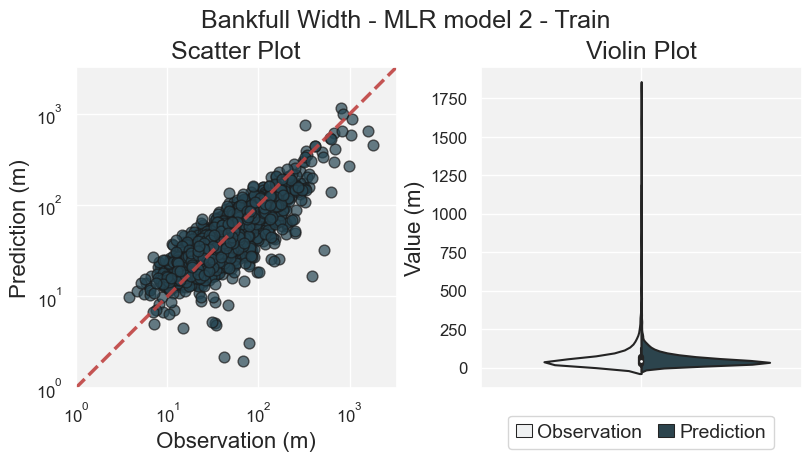

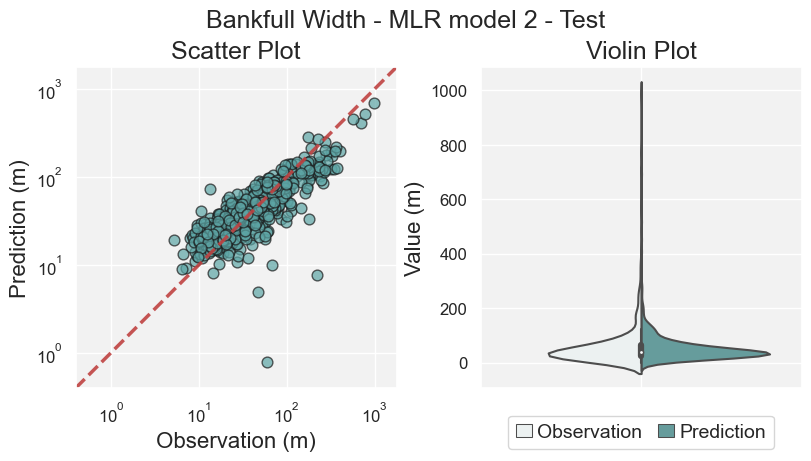

In [7]:
Title = ['Bankfull Width - MLR model 2 - Train', 'Bankfull Width - MLR model 2 - Test']
fc = ['#264653', '#5DA5A5']
pred_list= [mlr_pred_train, mlr_pred_test]
obs_list = [y_train, y_test]

for i in range (0,2):
    X = obs_list[i]
    Y = pred_list[i]
    Scatter_Violin_Plots(X, Y, "Observation (m)", "Prediction (m)", "Value (m)", Title[i], fc[i])